data collection 

In [1]:
# for collection of data i have used dataset from kaggle for  heart failure prediction dataset 
import pandas as pd
df = pd.read_csv("heart.csv")   # making a data frame variable for dataset 
df.head() # displaying few values 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


now checking if there is any missing value or any duplicate values 

In [6]:
# for there if any missing values .
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# removing any duplicate values 
df.drop_duplicates(inplace=True)



In [10]:
#for summary of database with datatypes 
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
#for insights in data 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Exploratory Data Analysis (EDA)

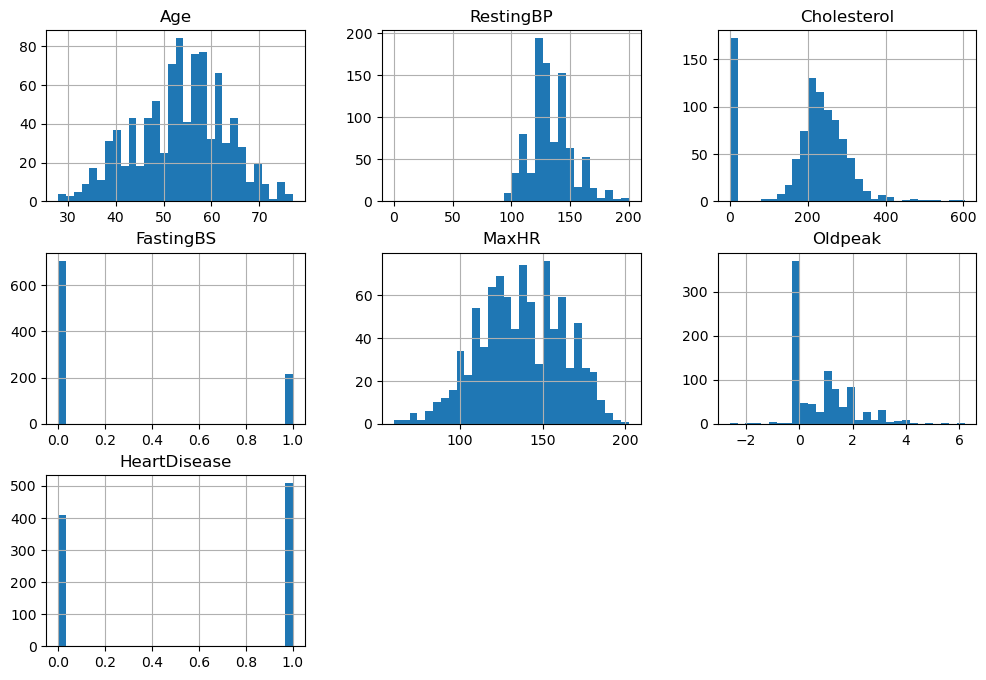

In [19]:
# 1 visualization of data 
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()

now findin the relation between the features  with corelation


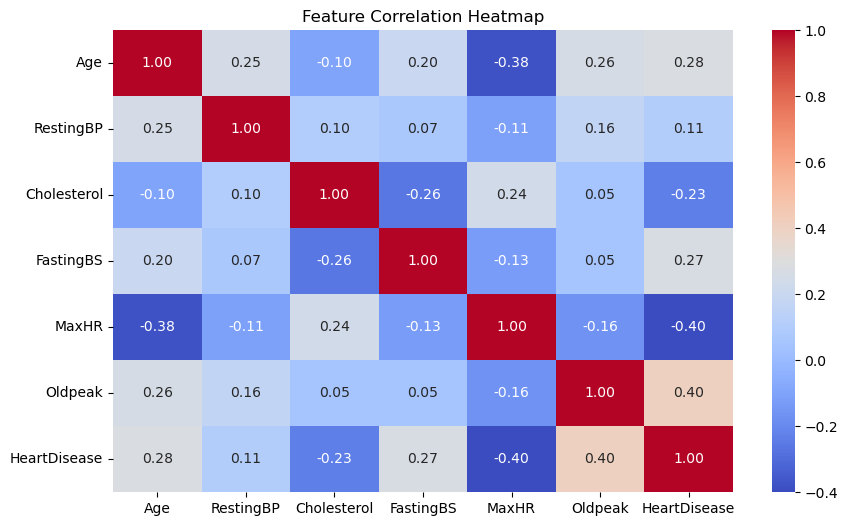

In [24]:

plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
df_numeric = df.select_dtypes(include=["number"])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

now target variable analysis  means heart desease occurance

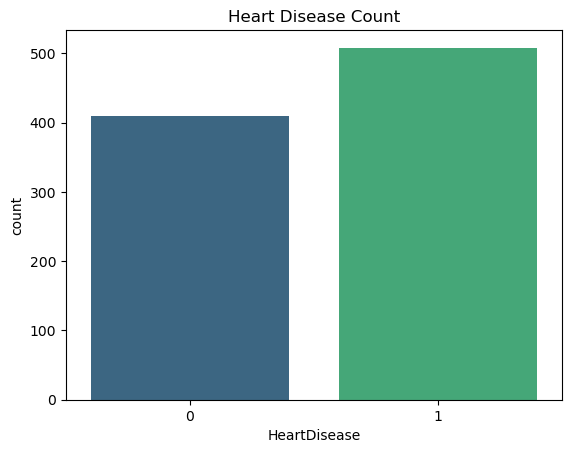

In [32]:
sns.countplot(x="HeartDisease", hue="HeartDisease", data=df, palette="viridis", legend=False)
plt.title("Heart Disease Count")
plt.show()


feature importance means identifying which feature is most contributing in the predictions using random forest


In [2]:
from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop("HeartDisease", axis=1)  # Features
y = df_numeric["HeartDisease"]  # Target

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()



NameError: name 'df_numeric' is not defined

now comes model selection and training
for this in first step i am comparing models  between 
Logistic regression, Desicion Tree, and Random Forest classifier 

In [5]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 326.8 kB/s eta 0:07:39
   ---------------------------------------- 0.1/150.0 MB 525.1 kB/s eta 0:04:46
   ---------------------------------------- 0.1/150.0 MB 655.8 kB/s eta 0:03:49
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:15
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.6/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 0.8/150.0 MB 1.9 MB/s eta 0:01:20
   ---------------------------------------- 0.9/150.0 MB 2.1 MB/s eta 0:01:13
   ---------------------------------------- 1.0/150.0 MB 2.1 MB/s eta 0:01:12
   -----

In [7]:
# decision tree model 
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Training Decision Tree Model
# dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
# dt_model.fit(X_train, y_train)

# # Predictions
# y_pred_dt = dt_model.predict(X_test)

# # Performance Metrics
# print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))


In [9]:
# logistic regression 
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Splitting the data
# X = df.drop("DEATH_EVENT", axis=1)  # Features
# y = df["DEATH_EVENT"]  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardizing the features (important for regression models)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Logistic Regression Model
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# # Predictions
# y_pred_log_reg = log_reg.predict(X_test)

# # Performance Metrics
# print("Accuracy using logistic regression :", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))